# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# api keys
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude 
from citipy import citipy 

# range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [2]:
lat_longs = []

cities = []

# uniform is different way to set up the range 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lats, longs)

In [3]:
for lat_long in lat_longs:
    
    # lat_long[0] is the first city on the lat and long, and go to the second city which is indicated by lat_long[1]. 
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # show all city in citipy libraries and put them into the list of cities and show them in the list
    if city not in cities:
        cities.append(city)

In [4]:
cities_list = list(lat_longs)
print(len(cities))

620


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# weather url 
weather_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&"

# save the variables in each lists 
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
long = []
wind_speed = []
city_name = []

In [8]:
# set up an index for each cities in the list 
index=1

for city in cities:
    
    # string concatenation, adding a string together 
    # query_url = weather_url + "appid=" + weather_api_key + "&q=" + city
    query_url = f"{weather_url}appid={weather_api_key}&q={city}"
    
    # create a get requests to the query_url created and converted to json data and save them to the response variable 
    response = requests.get(query_url).json()
    
    # try to go through all the data in corresponding to the response and store them in the list created
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        
        # print the final names of the city in corressponding to the index in the library 
        print(f'Processing record {index} of Set 1 : {city}.')
        
    except(KeyError):
        print("City not found. Skipping...")

Processing record 1 of Set 1 : tuatapere.
Processing record 1 of Set 1 : atuona.
Processing record 1 of Set 1 : gallup.
City not found. Skipping...
Processing record 1 of Set 1 : isangel.
Processing record 1 of Set 1 : nouadhibou.
Processing record 1 of Set 1 : estrela.
Processing record 1 of Set 1 : vanimo.
Processing record 1 of Set 1 : sitka.
Processing record 1 of Set 1 : hermanus.
Processing record 1 of Set 1 : georgetown.
Processing record 1 of Set 1 : sorong.
Processing record 1 of Set 1 : aljezur.
Processing record 1 of Set 1 : yellowknife.
Processing record 1 of Set 1 : aksu.
City not found. Skipping...
Processing record 1 of Set 1 : ushuaia.
Processing record 1 of Set 1 : busselton.
Processing record 1 of Set 1 : bredasdorp.
Processing record 1 of Set 1 : vila franca do campo.
Processing record 1 of Set 1 : avarua.
Processing record 1 of Set 1 : hithadhoo.
Processing record 1 of Set 1 : coquimbo.
Processing record 1 of Set 1 : rikitea.
Processing record 1 of Set 1 : severo-ku

Processing record 1 of Set 1 : sao filipe.
Processing record 1 of Set 1 : jacmel.
City not found. Skipping...
Processing record 1 of Set 1 : kautokeino.
Processing record 1 of Set 1 : praia da vitoria.
Processing record 1 of Set 1 : port augusta.
Processing record 1 of Set 1 : bardiyah.
Processing record 1 of Set 1 : loandjili.
Processing record 1 of Set 1 : najran.
Processing record 1 of Set 1 : kununurra.
Processing record 1 of Set 1 : den helder.
Processing record 1 of Set 1 : hoquiam.
Processing record 1 of Set 1 : saskylakh.
Processing record 1 of Set 1 : bismarck.
Processing record 1 of Set 1 : port macquarie.
Processing record 1 of Set 1 : cabo san lucas.
Processing record 1 of Set 1 : yangjiang.
City not found. Skipping...
Processing record 1 of Set 1 : port-cartier.
Processing record 1 of Set 1 : dingle.
Processing record 1 of Set 1 : letka.
Processing record 1 of Set 1 : henties bay.
Processing record 1 of Set 1 : katima mulilo.
Processing record 1 of Set 1 : vilhena.
Process

Processing record 1 of Set 1 : general pico.
City not found. Skipping...
Processing record 1 of Set 1 : alofi.
Processing record 1 of Set 1 : kanniyakumari.
Processing record 1 of Set 1 : dalaba.
Processing record 1 of Set 1 : bilma.
Processing record 1 of Set 1 : kursenai.
Processing record 1 of Set 1 : ponta do sol.
Processing record 1 of Set 1 : quepos.
Processing record 1 of Set 1 : vardo.
Processing record 1 of Set 1 : susangerd.
Processing record 1 of Set 1 : moissala.
Processing record 1 of Set 1 : komsomolskiy.
Processing record 1 of Set 1 : trincomalee.
Processing record 1 of Set 1 : taebla.
Processing record 1 of Set 1 : kalmunai.
Processing record 1 of Set 1 : moroni.
Processing record 1 of Set 1 : dunedin.
Processing record 1 of Set 1 : atar.
City not found. Skipping...
Processing record 1 of Set 1 : bosaso.
Processing record 1 of Set 1 : sinnamary.
Processing record 1 of Set 1 : bani.
Processing record 1 of Set 1 : nyaunglebin.
Processing record 1 of Set 1 : hirara.
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# store each lists to the dataframe 
city_df = pd.DataFrame({"City": city_name,
                        "Cloudiness": cloudiness,
                        "Country": country,
                        "Date": date,
                        "Humidity": humidity,
                        "Lat": lat,
                        "Long": long,
                        "Max Temp": max_temp,
                        "Wind Speed": wind_speed})

# rename its axis or index to City ID instead of the index number for clarification 
city_df = city_df.rename_axis('City ID')

In [12]:
# save it to the csv file using to_csv function and set up an encoding to utf-8
city_df.to_csv("city_data.csv", encoding="utf-8")

# retrive the first 5 dataframe 
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Tuatapere,99,NZ,1600371539,81,-46.13,167.68,3.89,3.58
1,Atuona,39,PF,1600371825,78,-9.80,-139.03,25.34,9.56
2,Gallup,1,US,1600371728,15,35.53,-108.74,26.00,2.60
3,Isangel,75,VU,1600371825,94,-19.55,169.27,21.00,4.30
4,Nouadhibou,79,MR,1600371825,67,20.93,-17.03,26.59,8.31


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
sort_cities = city_df.sort_values(by=["Humidity"], ascending=False)
sort_cities

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
City ID,,,,,,,,,
490,Eureka,16,US,1600371888,100,40.80,-124.16,21.11,4.23
301,Luba,40,GQ,1600371865,100,3.46,8.55,25.00,3.10
947,Ferrol,40,ES,1600371874,100,43.48,-8.24,16.67,1.50
272,Gold Coast,90,AU,1600371861,100,-28.00,153.43,16.67,2.44
952,Dalaba,100,GN,1600371875,100,10.70,-12.25,18.05,1.69
...,...,...,...,...,...,...,...,...,...
591,Rosarito,75,MX,1600371829,11,32.33,-117.03,35.00,4.10
840,Barão de Melgaço,93,BR,1600371861,11,-16.19,-55.97,39.00,3.10
25,Rosarito,75,MX,1600371829,11,32.33,-117.03,35.00,4.10


In [24]:
print("No cities with the humidity greater than 100%. Skipping this step.")

No cities with the humidity greater than 100%. Skipping this step.


In [25]:
#  Get the indices of cities that have humidity over 100%.


In [26]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

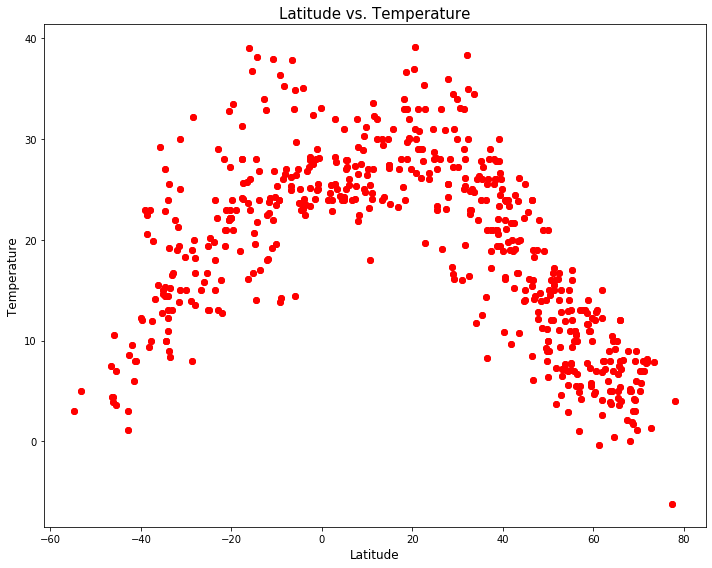

In [27]:
fig1, ax1 = plt.subplots(figsize=(10,8))

temperature = city_df['Max Temp']
latitude = city_df['Lat']

plt.scatter(latitude, temperature, marker="o", color="red")

plt.title("Latitude vs. Temperature", fontsize = 15)
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Temperature", fontsize = 12)
plt.tight_layout()
plt.savefig("Latitude_vs_Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

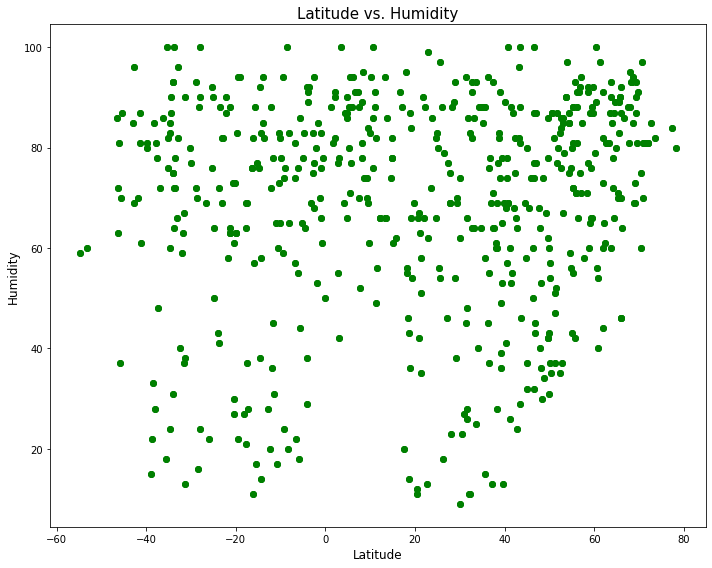

In [28]:
fig1, ax1 = plt.subplots(figsize=(10,8))

plt.scatter(city_df['Lat'], city_df['Humidity'], marker="o", color="green")

plt.title("Latitude vs. Humidity", fontsize = 15)
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Humidity", fontsize = 12)
plt.tight_layout()
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

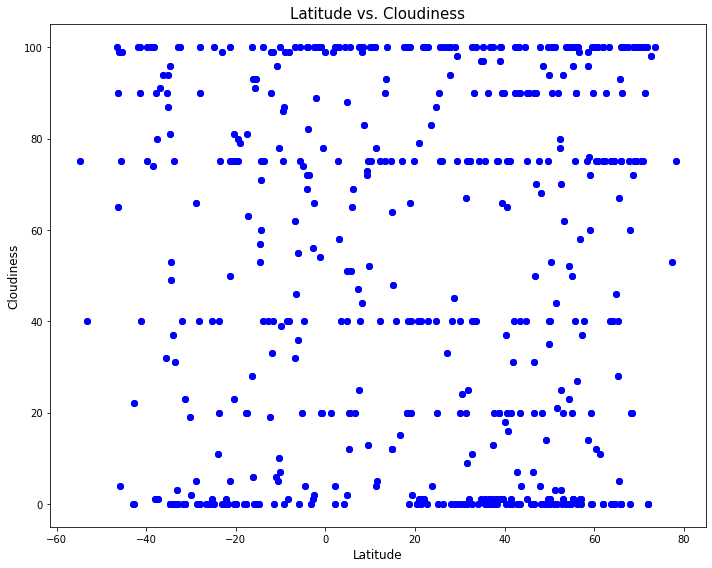

In [29]:
fig1, ax1 = plt.subplots(figsize=(10,8))

plt.scatter(city_df['Lat'], city_df['Cloudiness'], marker="o", color="blue")

plt.title("Latitude vs. Cloudiness", fontsize = 15)
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Cloudiness", fontsize = 12)
plt.tight_layout()
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

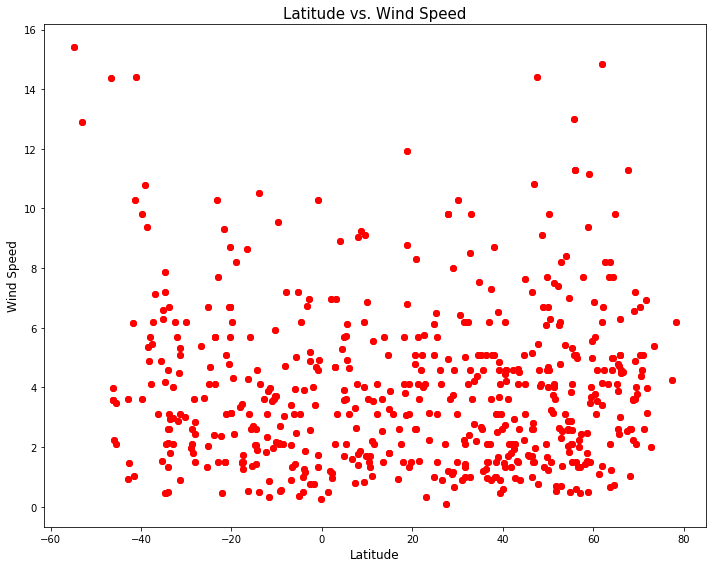

In [30]:
fig1, ax1 = plt.subplots(figsize=(10,8))

plt.scatter(city_df['Lat'], city_df['Wind Speed'], marker="o", color="red")

plt.title("Latitude vs. Wind Speed", fontsize = 15)
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Wind Speed", fontsize = 12)
plt.tight_layout()
plt.savefig("Latitude_vs_Wind Speed.png")
plt.show()

## Linear Regression

In [31]:
from scipy.stats import linregress
from sklearn import datasets
import scipy as stats
import statistics

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [32]:
slope, intercept, rvalue, pvalue, stderr = linregress(latitude, temperature)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: -0.09683336217706431
intercept: 20.987056562856118
rvalue: -0.3639829346805263
pvalue: 8.68261029945695e-37
stderr: 0.007371292080261874
line equation: y = -0.1x + 20.99


The r-squared is: 0.13248357673864827


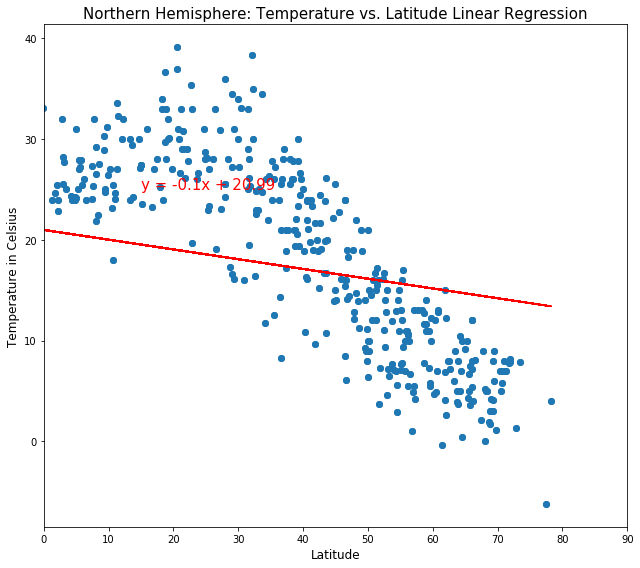

In [33]:
fig1, ax1 = plt.subplots(figsize=(9,8))

temperature = city_df['Max Temp']
latitude = city_df['Lat']

slope, intercept, rvalue, pvalue, stderr = linregress(latitude, temperature)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, temperature)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(15,25),fontsize=15,color="red")

plt.title("Northern Hemisphere: Temperature vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel("Temperature in Celsius", fontsize = 12)
plt.xlim(0,90)

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("NorthernHemis_Temp_vs_Latitude_LinearRegression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [34]:
temperature = city_df['Max Temp']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: -0.09683336217706431
intercept: 20.987056562856118
rvalue: -0.3639829346805263
pvalue: 8.68261029945695e-37
stderr: 0.007371292080261874
line equation: y = -0.1x + 20.99


The r-squared is: 0.13248357673864827


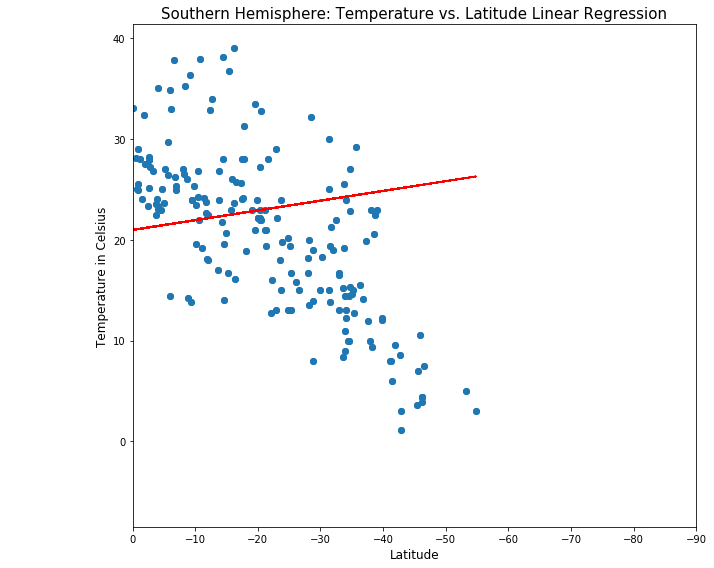

In [35]:
fig1, ax1 = plt.subplots(figsize=(10,8))

temperature = city_df['Max Temp']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, temperature)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, temperature)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

plt.title("Southern Hemisphere: Temperature vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Temperature in Celsius', fontsize = 12)
plt.xlim(0,-90)


print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("SouthernHemis_Temp_vs_Latitude_LinearRegression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [36]:
humidity_per = city_df['Humidity']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: 0.06304516957759253
intercept: 67.27773828587175
rvalue: 0.09879739677698164
pvalue: 0.0008730474168997784
stderr: 0.018890224691574187
line equation: y = 0.06x + 67.28


The r-squared is: 0.009760925609908343


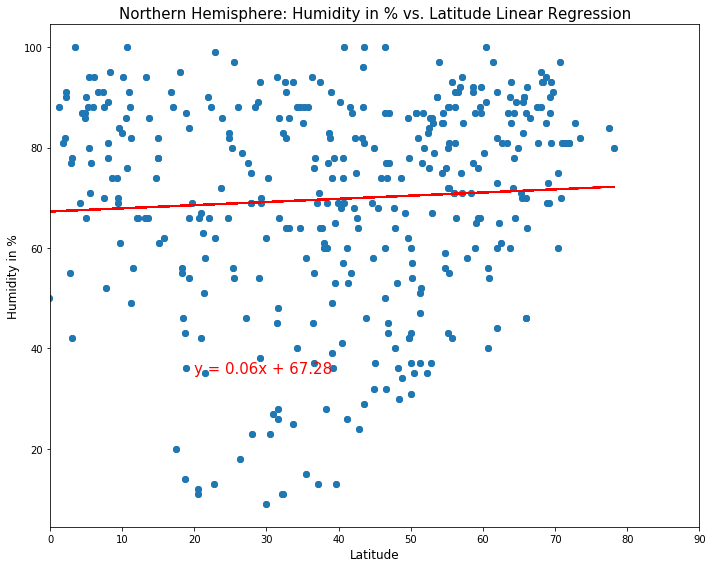

In [37]:
fig1, ax1 = plt.subplots(figsize=(10,8))

humidity_per = city_df['Humidity']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, humidity_per)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title("Northern Hemisphere: Humidity in % vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity in %', fontsize = 12)
plt.xlim(0,90)


print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("NorthernHemis_Humidity_vs_Latitude_LinearRegression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [38]:
humidity_per = city_df['Humidity']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: 0.06304516957759253
intercept: 67.27773828587175
rvalue: 0.09879739677698164
pvalue: 0.0008730474168997784
stderr: 0.018890224691574187
line equation: y = 0.06x + 67.28


The r-squared is: 0.009760925609908343


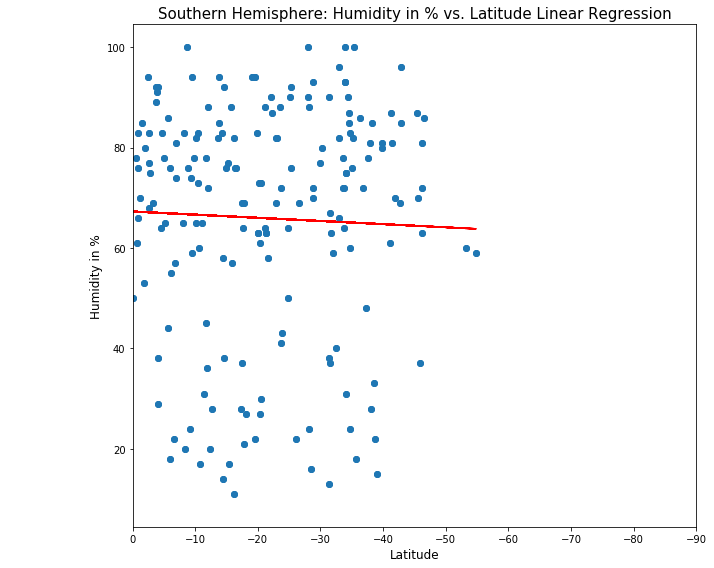

In [39]:
fig1, ax1 = plt.subplots(figsize=(10,8))

humidity_per = city_df['Humidity']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, humidity_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, humidity_per)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title("Southern Hemisphere: Humidity in % vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity in %', fontsize = 12)
plt.xlim(0,-90)


print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("SouthernHemis_Hemisphere_vs_Latitude_LinearRegression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [40]:
cloudiness_per = city_df['Cloudiness']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: 0.048691076843689216
intercept: 49.16766093829218
rvalue: 0.04220087851339405
pvalue: 0.1559221132139689
stderr: 0.03429269369904601
line equation: y = 0.05x + 49.17


The r-squared is: 0.0017809141473022433


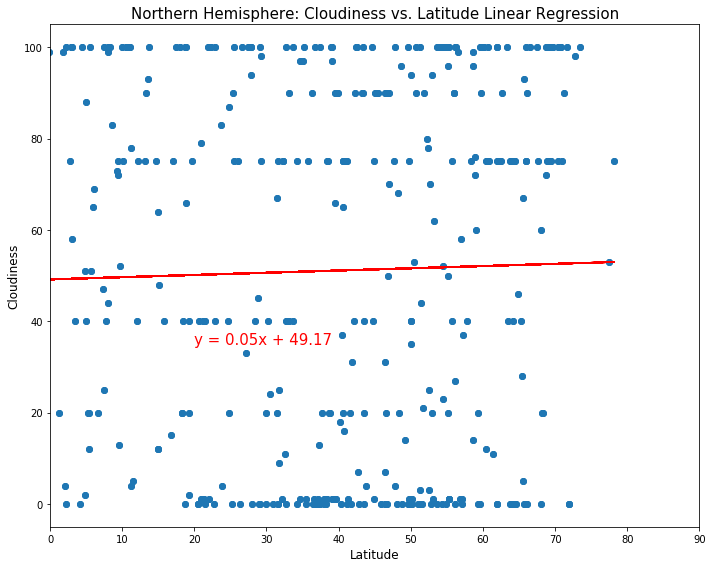

In [41]:
fig1, ax1 = plt.subplots(figsize=(10,8))

cloudiness_per = city_df['Cloudiness']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, cloudiness_per)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title("Northern Hemisphere: Cloudiness vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness', fontsize = 12)
plt.xlim(0,90)


print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("NorthernHemis_Cloudiness_vs_Latitude_LinearRegression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [42]:
cloudiness_per = city_df['Cloudiness']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: 0.048691076843689216
intercept: 49.16766093829218
rvalue: 0.04220087851339405
pvalue: 0.1559221132139689
stderr: 0.03429269369904601
line equation: y = 0.05x + 49.17


The r-squared is: 0.0017809141473022433


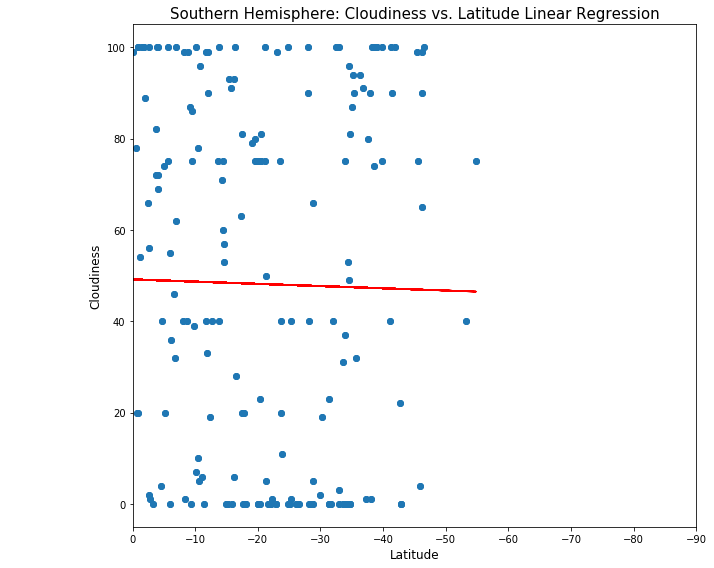

In [43]:
fig1, ax1 = plt.subplots(figsize=(10,8))

cloudiness_per = city_df['Cloudiness']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, cloudiness_per)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, cloudiness_per)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title("Southern Hemisphere: Cloudiness vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness', fontsize = 12)
plt.xlim(0,-90)


print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("SouthernHemis_Cloudiness_vs_Latitude_LinearRegression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [44]:
cloudiness_per = city_df['Wind Speed']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: -0.0010886121120914677
intercept: 3.9613907701178106
rvalue: -0.01391281936750396
pvalue: 0.6400669664462996
stderr: 0.0023274306922790814
line equation: y = -0.0x + 3.96


The r-squared is: 0.00019356654275279328


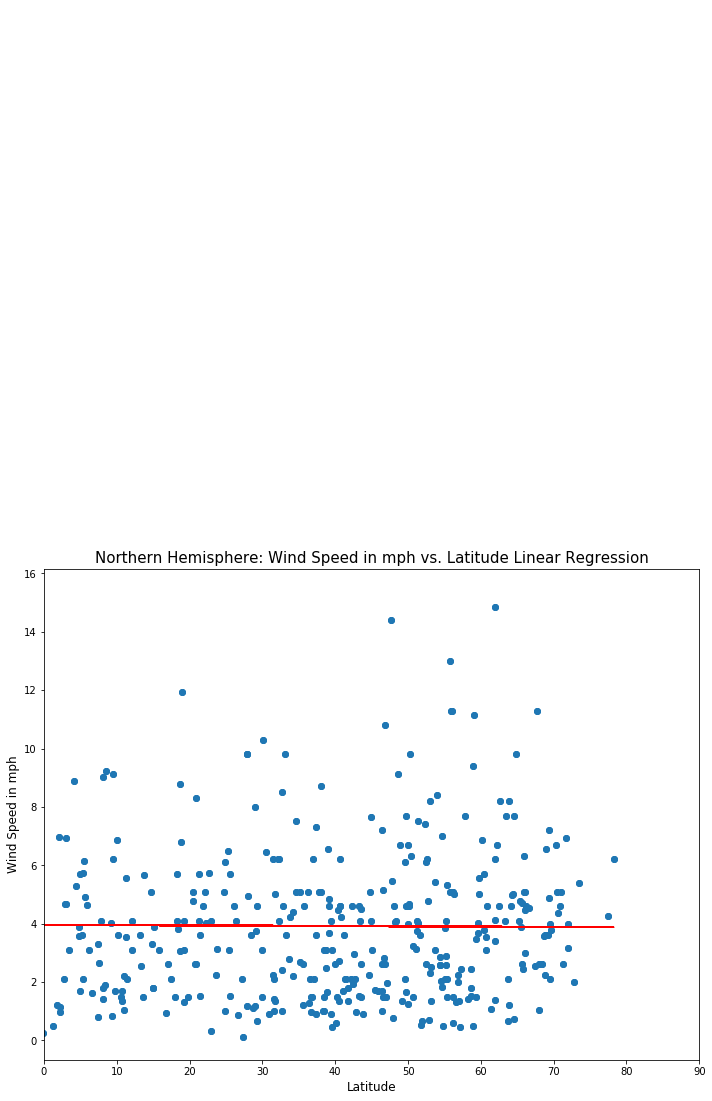

In [50]:
fig1, ax1 = plt.subplots(figsize=(10,50))

wind_speed_mph = city_df['Wind Speed']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed_mph)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, wind_speed)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title("Northern Hemisphere: Wind Speed in mph vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed in mph', fontsize = 12)
plt.xlim(0,90)


print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("NorthernHemis_WindSpeed_mph_vs_Latitude_LinearRegression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [51]:
cloudiness_per = city_df['Wind Speed']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'rvalue: {rvalue}')
print(f'pvalue: {pvalue}')
print(f'stderr: {stderr}')
# print(f'regression values{regress_values}')
print(f'line equation: {line_eq}')

slope: -0.0010886121120914677
intercept: 3.9613907701178106
rvalue: -0.01391281936750396
pvalue: 0.6400669664462996
stderr: 0.0023274306922790814
line equation: y = -0.0x + 3.96


The r-squared is: 0.00019356654275279328


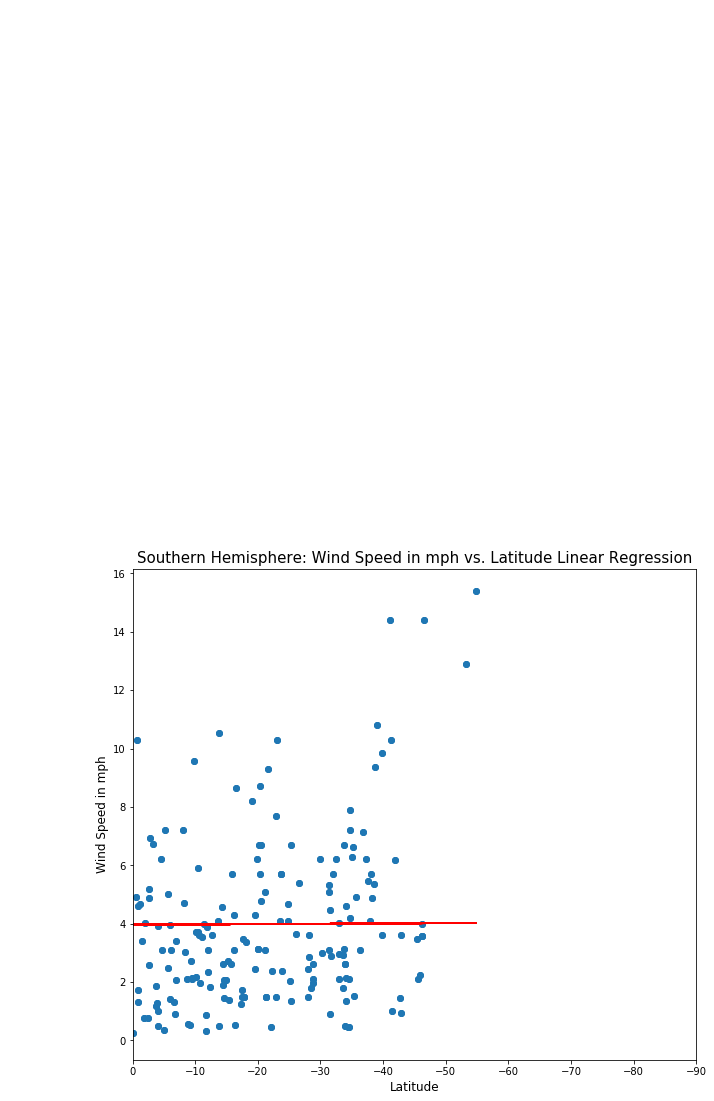

In [53]:
fig1, ax1 = plt.subplots(figsize=(10,50))

wind_speed_mph = city_df['Wind Speed']
latitude = city_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, wind_speed_mph)
regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(latitude, wind_speed_mph)
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.title("Southern Hemisphere: Wind Speed in mph vs. Latitude Linear Regression", fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed in mph', fontsize = 12)
plt.xlim(0,-90)


print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.savefig("SouthernHemis_WindSpeed_mph_vs_Latitude_LinearRegression.png")
plt.show()